In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
data=fetch_california_housing(as_frame=True)
df=data.frame
print(df.head())
x=df.drop("MedHouseVal",axis=1)
y=df['MedHouseVal']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


Initialize model

In [4]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
y_pred=lin_reg.predict(X_test)

Metrics

In [5]:
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

MAE: 0.533
MSE: 0.556
RMSE: 0.746
R² Score: 0.576


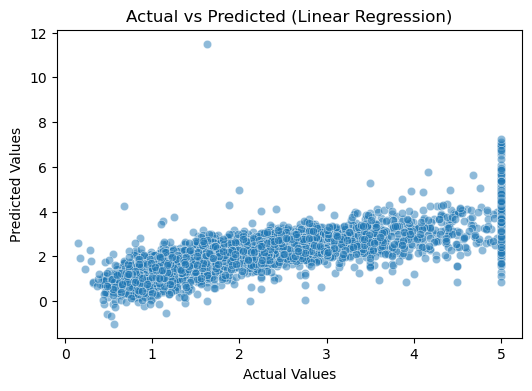

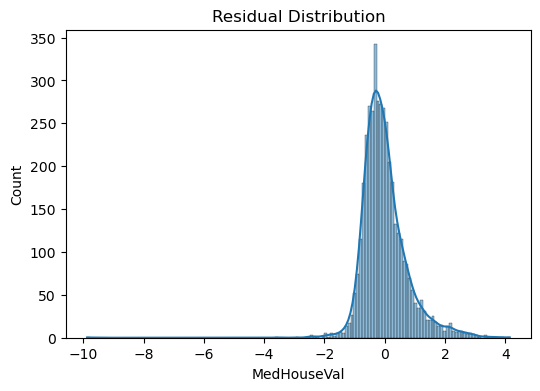

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

# Residual plot
residuals =Y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


In [13]:
from sklearn.preprocessing import PolynomialFeatures
#lets us chain preprocessing + model into one pipeline
from sklearn.pipeline import make_pipeline
x_single=df[['MedInc']]
y_single=df['MedHouseVal']
#We select only Median Income as a feature so we can visualize 2D curve.
X_train_s,X_test_s,Y_train_s,Y_test_s=train_test_split(x_single,y_single,test_size=0.2,random_state=42)
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())


In [14]:
poly_model.fit(X_train_s,Y_train_s)
poly_pred=poly_model.predict(X_test_s)

In [20]:
print("MAE:", mean_absolute_error(Y_test_s, poly_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test_s, poly_pred)))
print("R²:", r2_score(Y_test_s, poly_pred))


MAE: 0.6218963216963614
RMSE: 0.835641355185365
R²: 0.4671156210838615


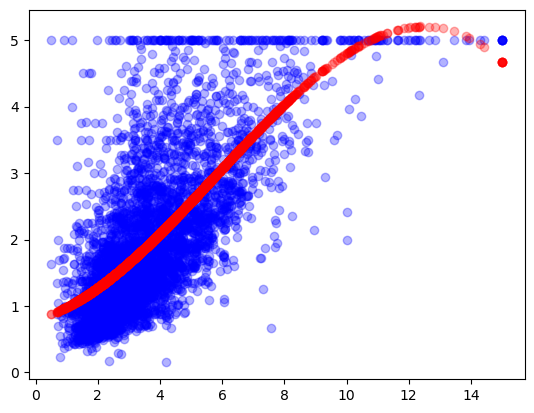

In [22]:
plt.scatter(X_test_s, Y_test_s, color="blue", alpha=0.3, label="Actual")
plt.scatter(X_test_s, poly_pred, color="red", alpha=0.3, label="Predicted")


Problem: In regression, if features are highly correlated or if we have too many features, the model may overfit.

Solution: Regularization → add a penalty to large coefficients.

Ridge (L2 penalty): Shrinks coefficients but doesn’t set them exactly to zero.

Lasso (L1 penalty): Shrinks AND can set some coefficients to exactly zero → does feature selection.

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Scale features (important for Ridge/Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Ridge & Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)

# Compare coefficients
coef_df = pd.DataFrame({
    "Feature": housing.feature_names,
    "Ridge Coef": ridge.coef_,
    "Lasso Coef": lasso.coef_
})

print(coef_df)


      Feature  Ridge Coef  Lasso Coef
0      MedInc    0.829593    0.705713
1    HouseAge    0.118817    0.106011
2    AveRooms   -0.265397   -0.000000
3   AveBedrms    0.305525   -0.000000
4  Population   -0.004480   -0.000000
5    AveOccup   -0.039330   -0.000000
6    Latitude   -0.899266   -0.011213
7   Longitude   -0.869916   -0.000000


In [26]:
from sklearn.linear_model import Ridge, Lasso

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha = regularization strength
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.01)  # smaller alpha so it doesn’t kill all coefficients
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)

# Evaluation
print("----- Ridge Regression -----")
print("MAE:", mean_absolute_error(y_test, y_ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("R²:", r2_score(y_test, y_ridge_pred))

print("\n----- Lasso Regression -----")
print("MAE:", mean_absolute_error(y_test, y_lasso_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("R²:", r2_score(y_test, y_lasso_pred))

# Compare coefficients
coef_df = pd.DataFrame({
    "Feature": housing.feature_names,
    "Ridge Coef": ridge.coef_,
    "Lasso Coef": lasso.coef_
})
print("\nCoefficient comparison:\n", coef_df)


----- Ridge Regression -----
MAE: 0.5332039182571588
RMSE: 0.7455222779992688
R²: 0.575854961144014

----- Lasso Regression -----
MAE: 0.5362504645663381
RMSE: 0.7378679815011978
R²: 0.5845196673976367

Coefficient comparison:
       Feature  Ridge Coef    Lasso Coef
0      MedInc    0.448511  4.088956e-01
1    HouseAge    0.009726  1.030849e-02
2    AveRooms   -0.123014 -4.744454e-02
3   AveBedrms    0.781417  3.633460e-01
4  Population   -0.000002 -3.086013e-07
5    AveOccup   -0.003526 -3.359456e-03
6    Latitude   -0.419787 -4.071099e-01
7   Longitude   -0.433681 -4.149332e-01
